<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
# If sklearn v.0.23.1 has not been installed: uncomment the line (remove #) and run this cell
# need to run only once until sklearn v.0.23.1 is properly installed

# !pip install scikit-learn==0.23.1

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-05-11 16:29:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K   123KB/s    in 0.2s    

2022-05-11 16:29:01 (123 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [8]:
# notice: installing seaborn might takes a few minutes
# If seaborn has not been installed: uncomment the line (remove #) and run this cell
# need to run only once until seaborn is properly installed

# !conda install -c anaconda seaborn -y

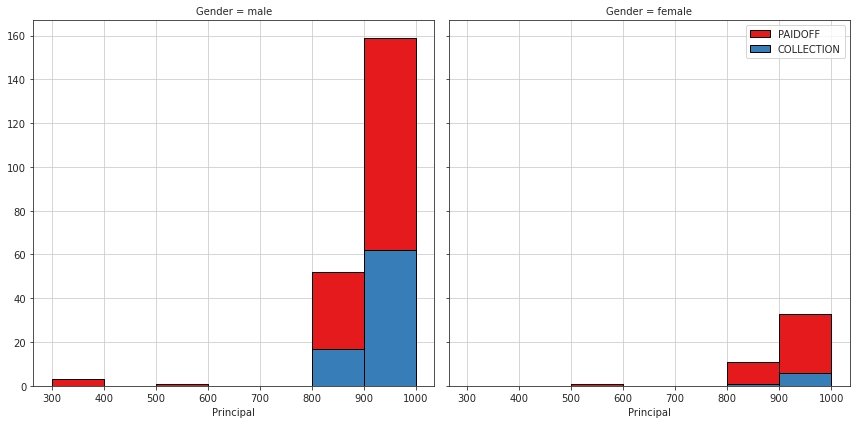

In [9]:
import seaborn as sns
sns.set_palette('Set1')  
sns.set_style("ticks",{'axes.grid' : True})
bins = np.linspace(df.Principal.min(), df.Principal.max(), 8)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, height=6, aspect=1, despine=False)
g.map(plt.hist, 'Principal', bins=bins, ec="k", edgecolor='black', linewidth=1)
g.axes[-1].legend()

g.set(xticks=np.linspace(df.Principal.min(), df.Principal.max(), 8))
plt.show()

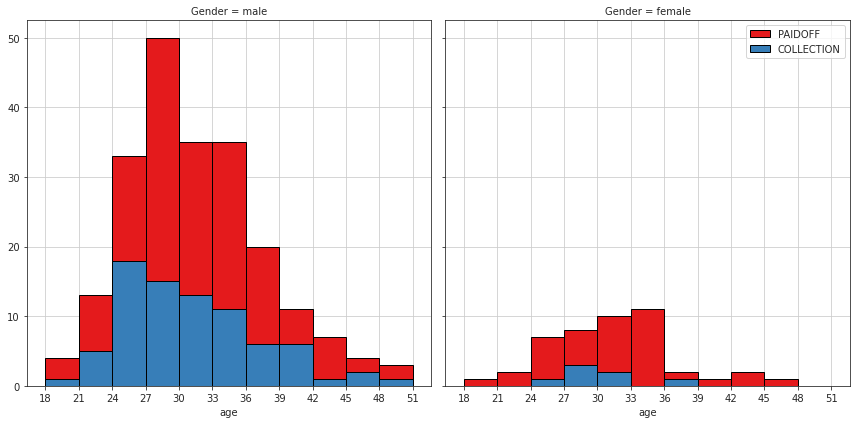

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 12)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, height=6, aspect=1, despine=False)
g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()
g.set(xticks=np.linspace(df.age.min(), df.age.max(), 12))
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


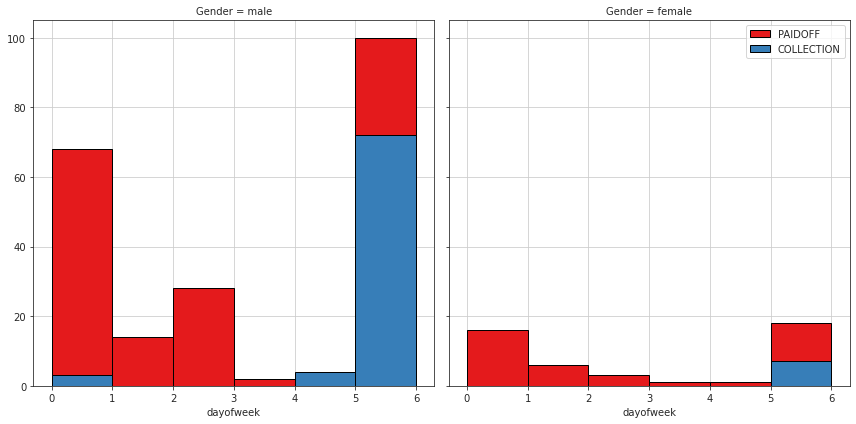

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 7)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, height=6, aspect=1, despine=False)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
g.set(xticks=np.linspace(df.dayofweek.min(), df.dayofweek.max(), 7))
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
# Feature.drop(['Master or Above'], axis = 1,inplace=True)   # "Master or Above" is not dropped intentionally
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


### Feature Selection


Let's define feature sets, X:


In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


What are our lables?


In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor (KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [21]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)  
# 80% Training 
# 20% Test

print ('Shape: Train set:', X_train.shape,  y_train.shape)
print ('Shape: Test set:', X_test.shape,  y_test.shape)

Shape: Train set: (276, 9) (276,)
Shape: Test set: (70, 9) (70,)


In [22]:
# Train and Predict
from sklearn.neighbors import KNeighborsClassifier

# Training
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)

# Predict
yhat = neigh.predict(X_test)
print(yhat[0:5])

# Print Accuracy Metrics
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

KNeighborsClassifier(n_neighbors=4)
['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Train set Accuracy:  0.8115942028985508
Test set Accuracy:  0.7


k: 7
mean_acc 0.8
mean_acc min-max
0.5857142857142857
0.8


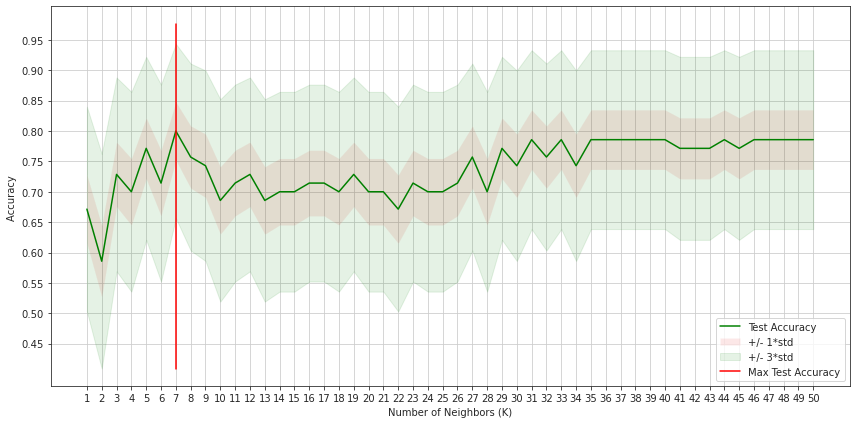

In [23]:
# Find optimal K

Ks = 51
train_acc = np.zeros((Ks-1))
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)   # train
    yhat = neigh.predict(X_test)    # predict
    train_acc[n-1] = metrics.accuracy_score(y_train, neigh.predict(X_train))    # train accuracy score
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    # test accuracy score
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

kmax = mean_acc.argmax()
print('k:', kmax+1)
print('mean_acc', mean_acc[kmax])

print('mean_acc min-max')
print(mean_acc.min())
print(mean_acc.max())

# plt.plot(range(1,Ks),train_acc,'b', label = 'Train Accuracy')
plt.plot(range(1,Ks),mean_acc,'g', label = 'Test Accuracy')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10, label = '+/- 1*std')
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10, label = '+/- 3*std', color="green")
plt.plot([mean_acc.argmax()+1,mean_acc.argmax()+1],[mean_acc.min()-3*std_acc.max(), mean_acc.max()+3*std_acc.max()],'r', label = 'Max Test Accuracy')
plt.legend(loc='lower right')
plt.xticks(range(1,Ks))
plt.yticks(np.linspace(0.45,0.95,11))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Decision Tree


In [24]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# 80% Training
# 20% Test

print ('Shape: Train set:', X_train.shape,  y_train.shape)
print ('Shape: Test set:', X_test.shape,  y_test.shape)

Shape: Train set: (276, 9) (276,)
Shape: Test set: (70, 9) (70,)


DecisionTrees's Accuracy:  0.7714285714285715


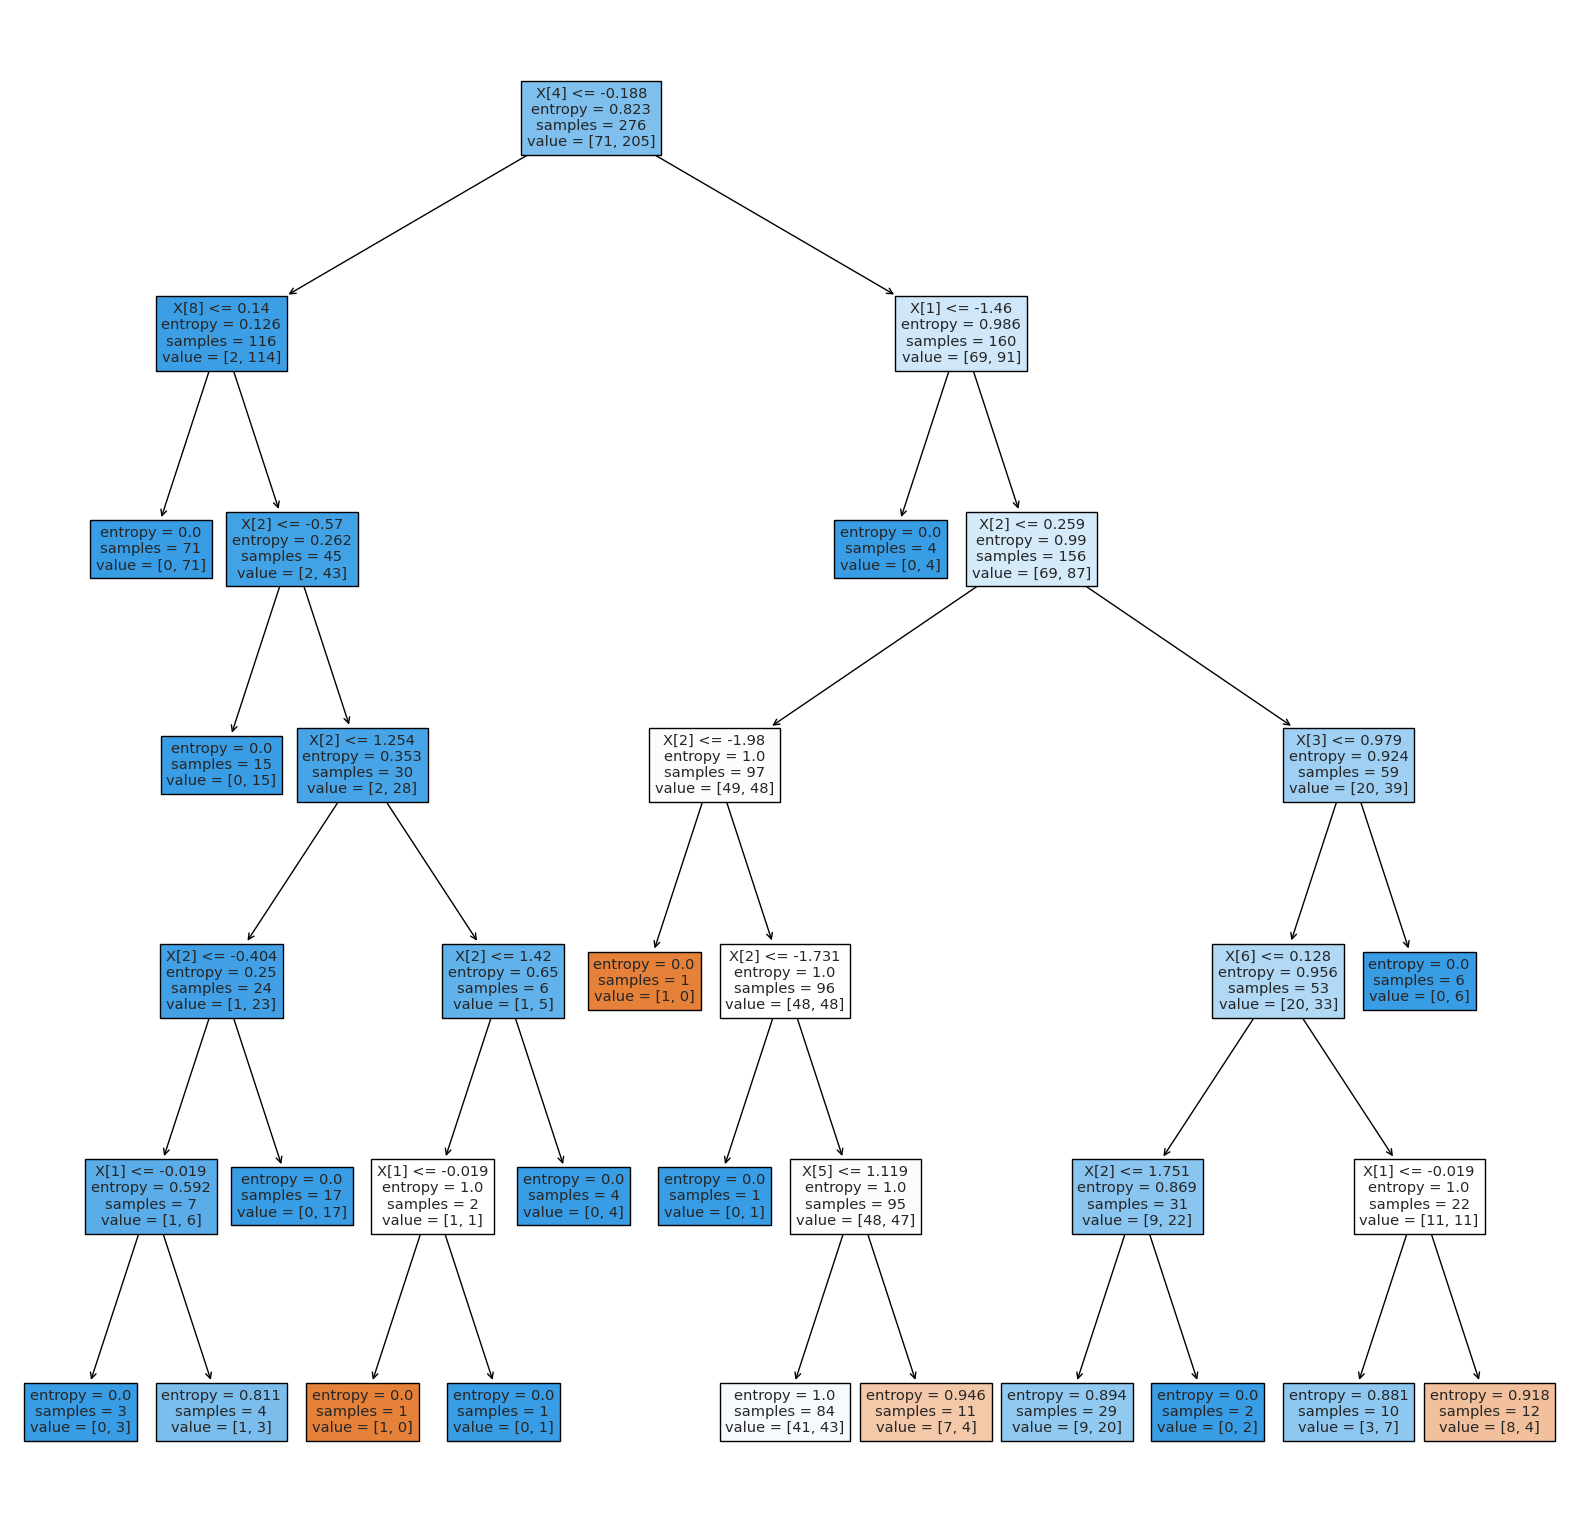

In [25]:
# Model, Train and Predict
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
# import sklearn
# print("sklearn version: ", sklearn.__version__)
    
loan_status_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
# print(loan_status_Tree) # it shows the default parameters

# training
loan_status_Tree.fit(X_train,y_train)
# print(tree.export_text(loan_status_Tree))   # not supported by sklearn version 0.20.1

# predict
predTree = loan_status_Tree.predict(X_test)
# print (predTree [0:5])
# print (y_test [0:5])

# evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

# Note: sklearn version 0.20.1 does not support tree.plot_tree()
# upgrade to newer version is needed

plt.figure(figsize=(20,20), dpi=100)
plt.rc('patch', edgecolor = 'black')
tree.plot_tree(loan_status_Tree, filled=True)
plt.show()

max_depth_value: 1
mean_acc 0.7857142857142857
mean_acc min-max
0.6142857142857143
0.7857142857142857


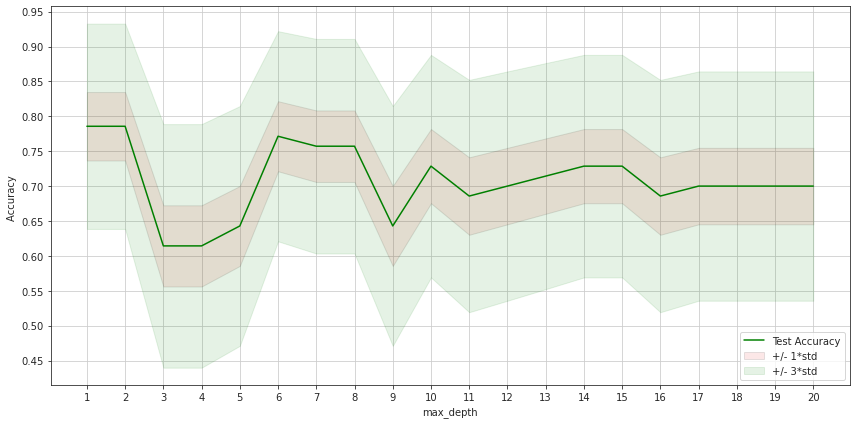

max_depth = 6..8 looks to be reasonable to reach better accuracy


In [26]:
# Find optimal max_depth
from sklearn import metrics

max_depth = 21
train_acc = np.zeros((max_depth-1))
mean_acc = np.zeros((max_depth-1))
std_acc = np.zeros((max_depth-1))

for n in range(1, max_depth):
    
    # Modelling, Train Model and Predict  
    loan_status_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = n) # modelling
    loan_status_Tree.fit(X_train,y_train) # train
    predTree = loan_status_Tree.predict(X_test)    # predict
    train_acc[n-1] = metrics.accuracy_score(y_train, loan_status_Tree.predict(X_train))    # train accuracy score
    mean_acc[n-1] = metrics.accuracy_score(y_test, predTree)    # test accuracy score
    std_acc[n-1] = np.std(predTree==y_test)/np.sqrt(predTree.shape[0])

max_depth_value = mean_acc.argmax()
print('max_depth_value:', max_depth_value+1)
print('mean_acc', mean_acc[max_depth_value])

print('mean_acc min-max')
print(mean_acc.min())
print(mean_acc.max())

# plt.plot(range(1,max_depth),train_acc,'b', label = 'Train Accuracy')
plt.plot(range(1,max_depth),mean_acc,'g', label = 'Test Accuracy')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.fill_between(range(1,max_depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10, label = '+/- 1*std')
plt.fill_between(range(1,max_depth),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10, label = '+/- 3*std', color="green")
# plt.plot([mean_acc.argmax()+1,mean_acc.argmax()+1],[mean_acc.min()-3*std_acc.max(), mean_acc.max()+3*std_acc.max()],'r', label = 'Max Test Accuracy')
plt.legend(loc='lower right')
plt.xticks(range(1,max_depth))
plt.yticks(np.linspace(0.45,0.95,11))
plt.ylabel('Accuracy ')
plt.xlabel('max_depth')
plt.grid(True)
plt.tight_layout()
plt.show()
print('max_depth = 6..8 looks to be reasonable to reach better accuracy')

# Support Vector Machine


In [27]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
# 80% Training 
# 20% Test

print ('Shape: Train set:', X_train.shape,  y_train.shape)
print ('Shape: Test set:', X_test.shape,  y_test.shape)

Shape: Train set: (276, 9) (276,)
Shape: Test set: (70, 9) (70,)


In [28]:
# Modeling (SVM with Scikit-learn)

from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)  # training
yhat = clf.predict(X_test) # predict
yhat [0:5]

#Evaluation

from sklearn.metrics import f1_score
print(f1_score(y_test, yhat, average='weighted'))

# Note: upgrade sklearn to newer version if jaccard_score is not supported
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, yhat, pos_label='PAIDOFF'))

display(yhat)

0.7275882012724117
0.7272727272727273


array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [29]:
# Which Kernel is the best ?
# Accuracy Evaluation
print('''
# Jaccard : 0 (low) -> 1 (high)
# F1 Score : 0 (low) -> 1 (high)
''')

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn import metrics

clf2 = svm.SVC(kernel='rbf', probability=True)
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
yhat2_prob = clf2.predict_proba(X_test)

print('rbf')
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2, pos_label='PAIDOFF'))

clf2 = svm.SVC(kernel='linear', probability=True)
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print('linear')
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2, pos_label='PAIDOFF'))

clf2 = svm.SVC(kernel='poly', probability=True)
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print('poly')
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2, pos_label='PAIDOFF'))

clf2 = svm.SVC(kernel='sigmoid', probability=True)
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print('sigmoid')
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2, pos_label='PAIDOFF'))
print("\nSelect Kernel Type: 'rbf', 'linear', 'poly', or 'sigmoid' which could give better accuracy")


# Jaccard : 0 (low) -> 1 (high)
# F1 Score : 0 (low) -> 1 (high)

rbf
Avg F1-score: 0.7276
Jaccard score: 0.7273
linear
Avg F1-score: 0.6914
Jaccard score: 0.7857
poly
Avg F1-score: 0.7065
Jaccard score: 0.7681
sigmoid
Avg F1-score: 0.6954
Jaccard score: 0.7206

Select Kernel Type: 'rbf', 'linear', 'poly', or 'sigmoid' which could give better accuracy


# Logistic Regression


In [30]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
# 80% Training 
# 20% Test

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


In [31]:
# Model, Train, Predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

hyperparameter=0.05  # Inverse of regularization strength

# training
LR = LogisticRegression(C=hyperparameter, solver='liblinear').fit(X_train,y_train)
print(LR)
# predict
yhat = LR.predict(X_test)
# print(yhat)
yhat_prob = LR.predict_proba(X_test)
# print(yhat_prob)

# Accuracy Evaluation
print('''
# Jaccard : 0 (low) -> 1 (high)
# F1 Score : 0 (low) -> 1 (high)
# Log Loss : 0 (high) <- 1 (low)
''')

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat, pos_label='PAIDOFF'))
print("Log Loss : %.4f" % log_loss(y_test, yhat2_prob))

LogisticRegression(C=0.05, solver='liblinear')

# Jaccard : 0 (low) -> 1 (high)
# F1 Score : 0 (low) -> 1 (high)
# Log Loss : 0 (high) <- 1 (low)

Avg F1-score: 0.7048
Jaccard score: 0.7353
Log Loss : 0.5178


C: 0.05
mean_acc 0.7428571428571429
mean_acc min-max
0.6857142857142857
0.7428571428571429


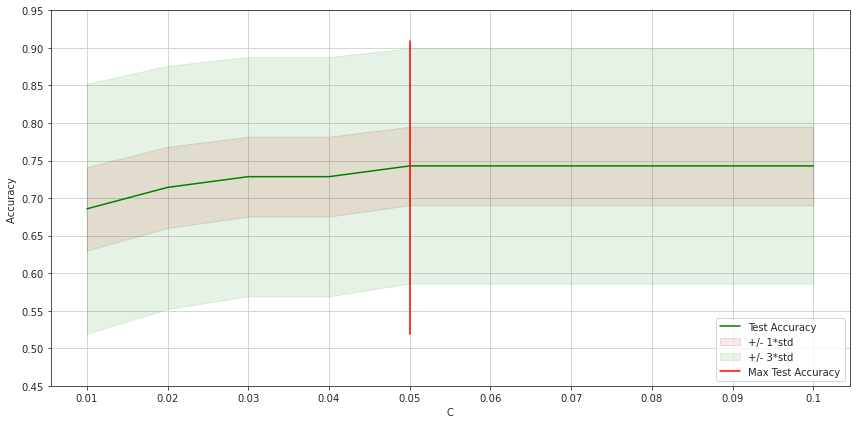

In [32]:
# Find optimal Inverse of regularization strength
from sklearn import metrics

number_of_try = 11

train_acc = np.zeros((number_of_try-1))
mean_acc = np.zeros((number_of_try-1))
std_acc = np.zeros((number_of_try-1))

for n in range(1, number_of_try):
    
    # Model, Train, Predict  
    
    LR = LogisticRegression(C=n/100, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    
    train_acc[n-1] = metrics.accuracy_score(y_train, LR.predict(X_train))    # train accuracy score
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    # test accuracy score
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

C_value = mean_acc.argmax()
print('C:', (C_value+1)/100)
print('mean_acc', mean_acc[C_value])

print('mean_acc min-max')
print(mean_acc.min())
print(mean_acc.max())

# plt.plot(range(1,number_of_try), train_acc, 'b', label = 'Train Accuracy')
plt.plot(range(1,number_of_try), mean_acc, 'g', label = 'Test Accuracy')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.fill_between(range(1,number_of_try), mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10, label = '+/- 1*std')
plt.fill_between(range(1,number_of_try), mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10, label = '+/- 3*std', color="green")
plt.plot([mean_acc.argmax()+1, mean_acc.argmax()+1], [mean_acc.min()-3*std_acc.max(), mean_acc.max()+3*std_acc.max()], 'r', label = 'Max Test Accuracy')
plt.legend(loc='lower right')
plt.xticks(range(1,number_of_try),np.linspace(1,10,number_of_try-1)/100)
plt.yticks(np.linspace(0.45,0.95,11))
plt.ylabel('Accuracy ')
plt.xlabel('C')
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Evaluation using Test set


In [33]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [34]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-05-11 16:29:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  9.78KB/s    in 0.4s    

2022-05-11 16:29:08 (9.78 KB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [35]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Preprocessing Loan Test data

In [36]:
# Preprocessing LOAN TEST data
print(test_df.shape)

# Convert to datetime object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
# print(test_df.head())

# Loan Status counts
# print(test_df['loan_status'].value_counts())

# Feature selection/extraction

# The day of the week people get the loan
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
# print(test_df.head())

# Convert Categorical features to numerical values
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
# print(test_df.head())

# One Hot Encoding
# Education

print(test_df.groupby(['education'])['loan_status'].value_counts(normalize=True))
print(test_df[['Principal','terms','age','Gender','education']].head())

test_Feature = test_df[['Principal','terms','age','Gender','weekend']]

# Convert Categorical features to numerical values

test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
# test_Feature.drop(['Master or Above'], axis = 1,inplace=True)    # "Master or Above" is not dropped intentionally
# print('test_Feature:')
# print(test_Feature.head())

X_test_data = test_Feature
# print('X_test_data:')
# print(X_test_data[0:5])

y_test_data = test_df['loan_status'].values
# print('y_test_data:')
# print(y_test_data[0:5])

# Normalize Data
# Data Standardization give data zero mean and unit variance (technically should be done after train test split)
print('Principal - terms - age - Gender - weekend - Bechalor- High School or Below - Master or Above - college')
X_test_data = preprocessing.StandardScaler().fit(X_test_data).transform(X_test_data)
print('X_test_data:')
print(X_test_data[0:5])

(54, 10)
education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64
   Principal  terms  age  Gender             education
0       1000     30   50       1              Bechalor
1        300      7   35       0       Master or Above
2       1000     30   43       1  High School or Below
3       1000     30   26       0               college
4        800     15   29       0              Bechalor
Principal - terms - age - Gender - weekend - Bechalor- High School or Below - Master or Above - college
X_test_data:
[[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.19611614 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404

## K Nearest Neighbor (KNN)

In [37]:
# KNN
# Training and Predict
from sklearn.neighbors import KNeighborsClassifier

# Train
k = 7
# neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)   # use 80% of Loan Train
neigh = KNeighborsClassifier(n_neighbors = k).fit(X,y)  # Use 100% of Loan Train
print(neigh)

# Predict
yhat = neigh.predict(X_test_data)
# yhat_prob = neigh.predict_proba(X_test_data)
# print(yhat[0:5])

# Accuracy Score
from sklearn import metrics
print("KNN's Accuracy: ", metrics.accuracy_score(y_test_data, yhat), "\n")

# Accuracy Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

print("Jaccard score: %.4f" % jaccard_score(y_test_data, yhat, pos_label='PAIDOFF'))
print("Avg F1-score: %.4f" % f1_score(y_test_data, yhat, average='weighted'))
# print("Log Loss : %.4f" % log_loss(y_test_data, yhat_prob))
print("Log Loss : NaN")


report = pd.DataFrame([['KNN', jaccard_score(y_test_data, yhat, pos_label='PAIDOFF'),
                        f1_score(y_test_data, yhat, average='weighted'),
                        'NA']], 
                        columns=['Algorithm','Jaccard','F1-score','LogLoss']).set_index('Algorithm')

# print(report)

report2 = pd.DataFrame([['KNN', metrics.accuracy_score(y_test_data, yhat)]], 
                        columns=['Algorithm','Accuracy Score']).set_index('Algorithm')
# print(report2)

KNeighborsClassifier(n_neighbors=7)
KNN's Accuracy:  0.7407407407407407 

Jaccard score: 0.7200
Avg F1-score: 0.7144
Log Loss : NaN


## Decision Tree

In [38]:
# Decision Tree

# Model, Train and Predict
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

loan_status_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
print(loan_status_Tree) # it shows the default parameters

# training
# loan_status_Tree.fit(X_train,y_train)    # use 80% of Loan Train
loan_status_Tree.fit(X,y)   # Use 100% of Loan Train
# print(tree.export_text(loan_status_Tree))

# predict
predTree = loan_status_Tree.predict(X_test_data)
# predTree_prob = loan_status_Tree.predict_proba(X_test_data)   
# print (predTree [0:5])
# print (y_test_data [0:5])

# Accuracy Score
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test_data, predTree), "\n")

# Accuracy Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

print("Jaccard score: %.4f" % jaccard_score(y_test_data, predTree, pos_label='PAIDOFF'))
print("Avg F1-score: %.4f" % f1_score(y_test_data, predTree, average='weighted'))
# print("Log Loss : %.4f" % log_loss(y_test_data, predTree_prob))
print("Log Loss : NaN")

report = report.append(pd.DataFrame([['Decision Tree', jaccard_score(y_test_data, predTree, pos_label='PAIDOFF'),
                        f1_score(y_test_data, predTree, average='weighted'),
                        'NA']], 
                        columns=['Algorithm','Jaccard','F1-score','LogLoss']).set_index('Algorithm'))

# print(report)

report2 = report2.append(pd.DataFrame([['Decision Tree', metrics.accuracy_score(y_test_data, predTree)]], 
                        columns=['Algorithm','Accuracy Score']).set_index('Algorithm'))

# print(report2)


DecisionTreeClassifier(criterion='entropy', max_depth=8)
DecisionTrees's Accuracy:  0.7962962962962963 

Jaccard score: 0.7755
Avg F1-score: 0.7705
Log Loss : NaN


## Support Vector Machine

In [39]:
# SVM

# Model, Train and Predict
from sklearn import svm

# Model

# clf = svm.SVC(kernel='rbf', probability=True, random_state = 4)
clf = svm.SVC(kernel='linear', probability=True, random_state = 4)
# clf = svm.SVC(kernel='poly', probability=True, random_state = 4)
# clf = svm.SVC(kernel='sigmoid', probability=True, random_state = 4)
print(clf)

# train

# clf.fit(X_train, y_train)    # use 80% of Loan Train
clf.fit(X, y)    # Use 100% of Loan Train

# predict
yhat = clf.predict(X_test_data) 
# yhat_prob = clf.predict_proba(X_test_data) # predict

# yhat [0:5]

# Accuracy Score
from sklearn import metrics
print("SVM's Accuracy: ", metrics.accuracy_score(y_test_data, yhat), "\n")

# Accuracy Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

print("Jaccard score: %.4f" % jaccard_score(y_test_data, yhat, pos_label='PAIDOFF'))
print("Avg F1-score: %.4f" % f1_score(y_test_data, yhat, average='weighted'))
# print("Log Loss : %.4f" % log_loss(y_test_data, yhat_prob))
print("Log Loss : NaN")

report = report.append(pd.DataFrame([['SVM', jaccard_score(y_test_data, yhat, pos_label='PAIDOFF'),
                        f1_score(y_test_data, yhat, average='weighted'),
                        'NA']], 
                        columns=['Algorithm','Jaccard','F1-score','LogLoss']).set_index('Algorithm'))

# print(report)

report2 = report2.append(pd.DataFrame([['SVM', metrics.accuracy_score(y_test_data, yhat)]], 
                        columns=['Algorithm','Accuracy Score']).set_index('Algorithm'))

# print(report2)


SVC(kernel='linear', probability=True, random_state=4)
SVM's Accuracy:  0.7407407407407407 

Jaccard score: 0.7407
Avg F1-score: 0.6304
Log Loss : NaN


## Logistic Regression

In [40]:
# Logistic Regression

# Model, Train, Predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

hyperparameter=0.06  # Inverse of regularization strength

# train
# LR = LogisticRegression(C=hyperparameter, solver='liblinear').fit(X_train,y_train)   # use 80% of Loan Train
LR = LogisticRegression(C=hyperparameter, solver='liblinear').fit(X,y)   # Use 100% of Loan Train
print(LR)

# predict
yhat = LR.predict(X_test_data)
# print(yhat)
yhat_prob = LR.predict_proba(X_test_data)
# print(yhat_prob)

# Accuracy Score
from sklearn import metrics
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test_data, yhat), "\n")

# Accuracy Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

print("Jaccard score: %.4f" % jaccard_score(y_test_data, yhat, pos_label='PAIDOFF'))
print("Avg F1-score: %.4f" % f1_score(y_test_data, yhat, average='weighted'))
print("Log Loss : %.4f" % log_loss(y_test_data, yhat_prob))

report = report.append(pd.DataFrame([['Logistic Regression', jaccard_score(y_test_data, yhat, pos_label='PAIDOFF'),
                        f1_score(y_test_data, yhat, average='weighted'),
                        log_loss(y_test_data, yhat_prob)]], 
                        columns=['Algorithm','Jaccard','F1-score','LogLoss']).set_index('Algorithm'))

# print(report)

report2 = report2.append(pd.DataFrame([['Logistic Regression', metrics.accuracy_score(y_test_data, yhat)]], 
                        columns=['Algorithm','Accuracy Score']).set_index('Algorithm'))

# print(report2)


LogisticRegression(C=0.06, solver='liblinear')
Logistic Regression's Accuracy:  0.7592592592592593 

Jaccard score: 0.7547
Avg F1-score: 0.6718
Log Loss : 0.4885


# Print Report

In [41]:
print('''
- Accuracy Score : 0 (low accuracy)  -> 1 (high accuracy)
''')

display(report2.reset_index().style.hide_index())

print('''
- Jaccard  Score : 0 (low accuracy)  -> 1 (high accuracy)
- F1 Score Score : 0 (low accuracy)  -> 1 (high accuracy)
- Log Loss Score : 0 (high accuracy) <- 1 (low accuracy)
''')

display(report.reset_index().style.hide_index())

print("\nConclusion: Decision Tree Learning Model with max_depth = 8 gives the best prediction accuracy.")



- Accuracy Score : 0 (low accuracy)  -> 1 (high accuracy)



Algorithm,Accuracy Score
KNN,0.740741
Decision Tree,0.796296
SVM,0.740741
Logistic Regression,0.759259



- Jaccard  Score : 0 (low accuracy)  -> 1 (high accuracy)
- F1 Score Score : 0 (low accuracy)  -> 1 (high accuracy)
- Log Loss Score : 0 (high accuracy) <- 1 (low accuracy)



Algorithm,Jaccard,F1-score,LogLoss
KNN,0.720000,0.714431,NA
Decision Tree,0.775510,0.770541,NA
SVM,0.740741,0.630418,NA
Logistic Regression,0.754717,0.671764,0.488536



Conclusion: Decision Tree Learning Model with max_depth = 8 gives the best prediction accuracy.


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
